## **DAY 02**

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

**Reading Data**

In [2]:
# Read the dataset
dataset = pd.read_csv('C:/MAFAS/APU/UNIVERSITY COLLABORATIONS/VET Institute of Arts and Science/12-17 September 2025/Workshop/DAY 02/IMDb_Reviews.csv')
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


**Random Sampling**

Random sampling ensures fairness, reduces bias, and allows valid generalization from sample to population. Random sampling makes big data manageable, efficient, and still statistically valid.

In [3]:
# Perform random sampling
dataset = dataset.sample(n = 25000, random_state = 42)  # Adjust the value of n as needed

# Reset index
dataset.reset_index(drop = True, inplace = True)

In [4]:
dataset

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative
...,...,...
24995,More directors like Nacho Vigalondo need a gre...,positive
24996,Rita Hayworth lights up the screen in this fun...,positive
24997,"The biggest heroes, is one of the greatest mov...",positive
24998,I happened to see a promo for this movie on Sp...,negative


In [5]:
# Checking missing values
dataset.isnull().sum() # NULL finding

review       0
sentiment    0
dtype: int64

In [6]:
print("Number Of Duplicates:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace = True)
print("Number Of Duplicates after drop:", dataset.duplicated().sum())

Number Of Duplicates: 124
Number Of Duplicates after drop: 0


**Checking Target Variable class distribution**

sentiment
positive    12495
negative    12381
Name: count, dtype: int64


Text(0.5, 0, 'Sentiment')

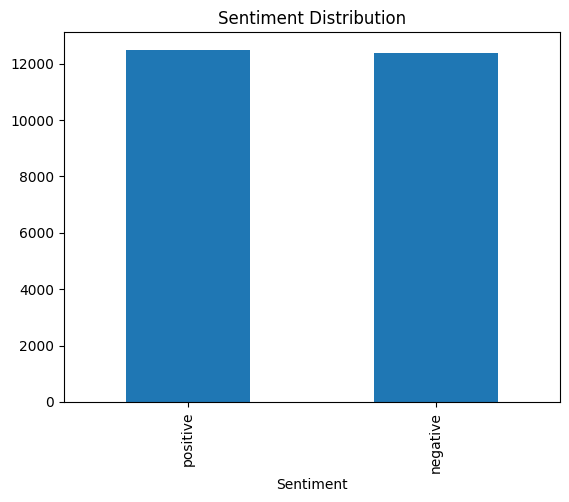

In [7]:
print(dataset['sentiment'].value_counts())
dataset['sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment Distribution')
plt.xlabel('Sentiment') 

**Text Normalization**

In [8]:
# Convert to lowercase
dataset['review'] = dataset['review'].apply(lambda x:x.lower())

**Removing HTML Tags**

In [9]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
dataset['review'] = dataset['review'].apply(remove_tags)

**Remove URLs**

In [10]:
def remove_urls(raw_text):
    cleaned_text = re.sub(r'http[s]?://\S+', '', raw_text)
    return cleaned_text

# Apply the function to your dataset
dataset['review'] = dataset['review'].apply(remove_urls)

**Remove Punctuation**

In [11]:
def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,'')
    return text
dataset['review'] = dataset['review'].apply(remove_punctuation)

**Stopword Removal**

In [12]:
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
dataset['review'] = dataset['review'].apply(
    lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raheem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television shows appeal quite many differ...,positive
2,film quickly gets major chase scene ever incre...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectations somewhat high went see movie thou...,negative
...,...,...
24994,barely find words express utterly utterly awfu...,negative
24995,directors like nacho vigalondo need greater ou...,positive
24996,rita hayworth lights screen fun fancy delightf...,positive
24997,biggest heroes one greatest movies ever good s...,positive


**Tokenization**

In [14]:
# Tokenize the sentence
import nltk
nltk.download('punkt')
dataset['review'] = dataset['review'].apply(lambda sentence: word_tokenize(sentence))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raheem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
dataset['review'][0]

['really',
 'liked',
 'summerslam',
 'due',
 'look',
 'arena',
 'curtains',
 'look',
 'overall',
 'interesting',
 'reason',
 'anyways',
 'could',
 'one',
 'best',
 'summerslams',
 'ever',
 'wwf',
 'didnt',
 'lex',
 'luger',
 'main',
 'event',
 'yokozuna',
 'time',
 'ok',
 'huge',
 'fat',
 'man',
 'vs',
 'strong',
 'man',
 'im',
 'glad',
 'times',
 'changed',
 'terrible',
 'main',
 'event',
 'like',
 'every',
 'match',
 'luger',
 'terrible',
 'matches',
 'card',
 'razor',
 'ramon',
 'vs',
 'ted',
 'dibiase',
 'steiner',
 'brothers',
 'vs',
 'heavenly',
 'bodies',
 'shawn',
 'michaels',
 'vs',
 'curt',
 'hening',
 'event',
 'shawn',
 'named',
 'big',
 'monster',
 'body',
 'guard',
 'diesel',
 'irs',
 'vs',
 '123',
 'kid',
 'bret',
 'hart',
 'first',
 'takes',
 'doink',
 'takes',
 'jerry',
 'lawler',
 'stuff',
 'harts',
 'lawler',
 'always',
 'interesting',
 'ludvig',
 'borga',
 'destroyed',
 'marty',
 'jannetty',
 'undertaker',
 'took',
 'giant',
 'gonzalez',
 'another',
 'terrible',
 'm

In [16]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, shows, appeal, quite, many,...",positive
2,"[film, quickly, gets, major, chase, scene, eve...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectations, somewhat, high, went, see, movi...",negative
...,...,...
24994,"[barely, find, words, express, utterly, utterl...",negative
24995,"[directors, like, nacho, vigalondo, need, grea...",positive
24996,"[rita, hayworth, lights, screen, fun, fancy, d...",positive
24997,"[biggest, heroes, one, greatest, movies, ever,...",positive


**Lemmatization**

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # Convert POS tag to WordNet POS tag
        wn_tag = nltk.corpus.wordnet.NOUN
        if tag.startswith('J'):
            wn_tag = nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            wn_tag = nltk.corpus.wordnet.VERB
        elif tag.startswith('R'):
            wn_tag = nltk.corpus.wordnet.ADV
        # Lemmatize token with POS tag
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Apply lemmatization to your dataset column
dataset['review'] = dataset['review'].apply(lemmatize_with_pos)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\raheem\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raheem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, show, appeal, quite, many, ...",positive
2,"[film, quickly, get, major, chase, scene, ever...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectation, somewhat, high, go, see, movie, ...",negative
...,...,...
24994,"[barely, find, word, express, utterly, utterly...",negative
24995,"[director, like, nacho, vigalondo, need, great...",positive
24996,"[rita, hayworth, light, screen, fun, fancy, de...",positive
24997,"[big, hero, one, great, movie, ever, good, sto...",positive


**Rejoin tokens as a single sentence again**

In [19]:
def join(tokens):
    return ' '.join(token for token in tokens)

dataset['review'] = dataset['review'].apply(join)

In [20]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television show appeal quite many differe...,positive
2,film quickly get major chase scene ever increa...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectation somewhat high go see movie think s...,negative
...,...,...
24994,barely find word express utterly utterly awful...,negative
24995,director like nacho vigalondo need great outle...,positive
24996,rita hayworth light screen fun fancy delightfu...,positive
24997,big hero one great movie ever good story great...,positive


**DAY 03**

**Word Vectorization using TF-IDF**

Machine learning algorithms expect the data to be 2D array with rows as instances and columns as features. The problem with natural language is that the data is in the form of raw text, so that the text needs to be transformed into a vector.

**The process of transforming text into a vector is commonly referred to as text vectorization.** 

Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics. 

**Term Frequency-Inverse Document Frequency**

**TF-IDF**

Text vectorization algorithm namely TF-IDF vectorizer, which is a very popular approach for traditional machine learning algorithms in transforming text into vectors.

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

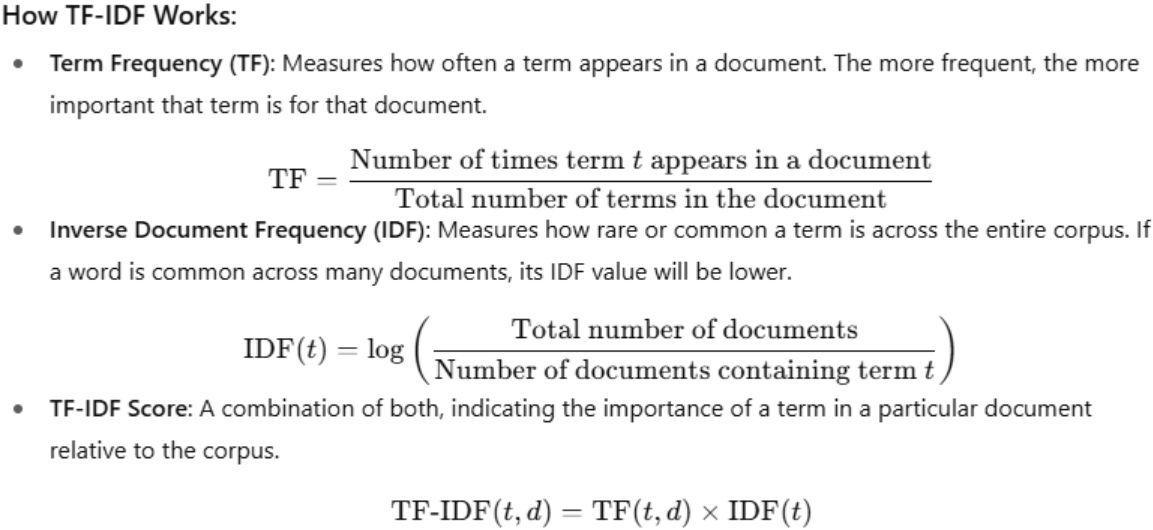

In [21]:
# Defining feature and labels
train, test = train_test_split(dataset, test_size = 0.2, shuffle = True) # Train Split 80-20
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range = (1,2), min_df = 10, max_features = 5000)

x_train_tfidf = tfidfvect.fit_transform(train['review']).toarray()
x_test_tfidf = tfidfvect.transform(test['review']).toarray()

y_train = train['sentiment']
y_test = test['sentiment']

In [22]:
x_train_tfidf

array([[0.11545204, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
y_train

8451     negative
24880    negative
22581    positive
18914    positive
14099    negative
           ...   
14991    positive
3110     negative
23699    negative
6681     positive
22382    positive
Name: sentiment, Length: 19900, dtype: object

**Machine Learning Model Building**

**Multinomial Naive Bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred_1 = mnb.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_1, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_1))

F1 Score:  0.8562815275769059
Classification Report: 
               precision    recall  f1-score   support

    negative       0.86      0.85      0.85      2444
    positive       0.85      0.87      0.86      2532

    accuracy                           0.86      4976
   macro avg       0.86      0.86      0.86      4976
weighted avg       0.86      0.86      0.86      4976



**Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
y_pred_2 = lr.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_2, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_2))

F1 Score:  0.8806099333813654
Classification Report: 
               precision    recall  f1-score   support

    negative       0.88      0.87      0.88      2444
    positive       0.88      0.89      0.88      2532

    accuracy                           0.88      4976
   macro avg       0.88      0.88      0.88      4976
weighted avg       0.88      0.88      0.88      4976



**Random Forest**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_pred_3 = rf.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_3, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_3))

F1 Score:  0.8396369351182292
Classification Report: 
               precision    recall  f1-score   support

    negative       0.83      0.85      0.84      2444
    positive       0.85      0.83      0.84      2532

    accuracy                           0.84      4976
   macro avg       0.84      0.84      0.84      4976
weighted avg       0.84      0.84      0.84      4976



**Hyperparameter Tuning**

**Multinomial Naive Bayes**

This machine learning algorithm does not have a significant hyper-paramter to tune. So, we apply Cross Validation to validate the model while reducing / eliminating the overfitting if any.

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(mnb, x_train_tfidf, y_train, cv = skf)

# CV Results
print ("CV Results of MNB: ", cv_results.mean())

CV Results of MNB:  0.8546231155778894


**Logistic Regression**

In [1]:
from numpy import arange
param_grid = {
    'penalty': ["l1", "l2", "elasticnet"],
    'solver': ['saga', 'liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}

In [2]:
grid_rf = GridSearchCV(lr, param_grid, scoring = 'f1_weighted', cv = skf)
grid_rf.fit(x_train_tfidf, y_train)
print("Best Parameters of LR: ", grid_rf.best_params_)
print("Best F1 Score of LR: ", grid_rf.best_score_)

NameError: name 'GridSearchCV' is not defined

**Random Forest**

In [ ]:
from numpy import arange
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': arange(3, 5, 1),
    'class_weight': ['balanced']
}

In [ ]:
grid_rf = GridSearchCV(rf, param_grid, scoring = 'f1_weighted', cv = skf)
grid_rf.fit(x_train_tfidf, y_train)
print("Best Parameters of RF: ", grid_rf.best_params_)
print("Best F1 Score of RF: ", grid_rf.best_score_)